<a href="https://colab.research.google.com/github/ayuksekdag/winacademy_python_dna/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/WincAcademy/practice_data/main/data/random_data_set/sample.csv'
df = pd.read_csv(url)

In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

In [5]:
df.dtypes

Unnamed: 0                     int64
datetime              datetime64[ns]
total_amount                 float64
number_of_products             int64
cashier                       object
store                         object
city                          object
discount_card_used              bool
dtype: object

In [6]:
df['datetime'].dt.year

0      2013
1      2012
2      1993
3      2014
4      2004
       ... 
195    1980
196    1993
197    1982
198    2012
199    1987
Name: datetime, Length: 200, dtype: int64

In [7]:
df.set_index('datetime', inplace = True)

In [8]:
df.dtypes

Unnamed: 0              int64
total_amount          float64
number_of_products      int64
cashier                object
store                  object
city                   object
discount_card_used       bool
dtype: object

<Axes: xlabel='datetime'>

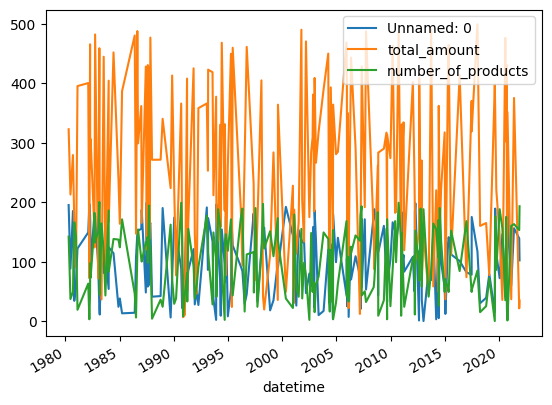

In [9]:
df.resample('Y').agg({'total_amount':'mean', 'number_of_products': 'sum'})

df.plot()

In [10]:
df = df.resample('Y').max()

df.head(5)

,Unnamed: 0,total_amount,number_of_products,cashier,store,city,discount_card_used
datetime,,,,,,,
1980-12-31,195,322.42,166,Rosa,Singtan,Parati,True
1981-12-31,122,394.95,19,Maria,Kutal,Parati,True
1982-12-31,197,481.72,182,Yolanda,Situwala,Távora,True
1983-12-31,126,458.57,200,Victoria,Kewat,Parati,True
1984-12-31,114,451.53,138,Laura,Ma,Ostras,True


In [23]:
df_bc=pd.read_csv('https://raw.githubusercontent.com/WincAcademy/practice_data/4f26a74d035f8e578a55f893df955087267fcafe/data/border_control.csv')
df_bc.head(1)

,id,full_name,registered_date,airport_name
0,1,Bear Scrigmour,12/25/2017,Fredericton Airport


In [24]:
df_bc['registered_date'].head(2)

0    12/25/2017
1     8/29/2012
Name: registered_date, dtype: object

In [25]:
df_bc['registered_date'] = pd.to_datetime(df_bc['registered_date'])
df_bc.dtypes

id                          int64
full_name                  object
registered_date    datetime64[ns]
airport_name               object
dtype: object

In [30]:
#question 1:
# When was the first record ever recorded?

df_bc['registered_date'].min()

Timestamp('2005-01-11 00:00:00')

In [38]:
df_bc['year'] = df_bc['registered_date'].dt.year

In [54]:
#How many pedestrians crossed the US borders in 2019? Give the answer by state.
fil = df_bc['year']==2019

(df_bc[fil]
 .groupby(['year'])
 .size()
)


year
2019    51
dtype: int64

<Axes: >

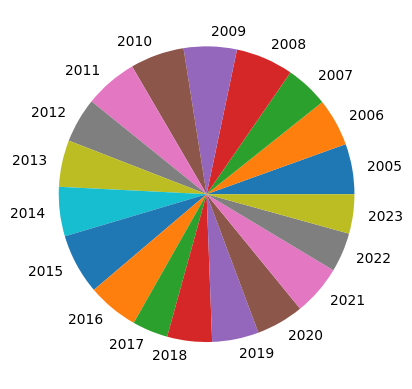

In [56]:
(df_bc
 .groupby(['year'])
 .size()
 .plot(kind='pie')
)